# Sentiment Analysis Model

Imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

Removing Excess Columns

In [133]:
data = pd.read_csv(r'data/train.csv', encoding='unicode_escape', low_memory=False)
columns_to_remove = ['textID', 'selected_text', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']


# drop useless columns
data = data.drop(columns=columns_to_remove)

# get an overview of what the dataset looks like
data.head()

,text,sentiment,Time of Tweet
0,"I`d have responded, if I were going",neutral,morning
1,Sooo SAD I will miss you here in San Diego!!!,negative,noon
2,my boss is bullying me...,negative,night
3,what interview! leave me alone,negative,morning
4,"Sons of ****, why couldn`t they put them on t...",negative,noon


### Numerify & Encode Columns

One Hot Encode & Numerify Sentiment & Time of Tweet Column

In [134]:
temp = pd.get_dummies(data, columns=['sentiment', 'Time of Tweet'])
data = temp

# bool to numeric function (cols_to_numerify_from_bool)
def bool_to_numeric(data_frame, feature):
    bool_to_numeric_dict = {True: 1, False: 0}
    data_frame[feature] = data_frame[feature].map(bool_to_numeric_dict)
    return data_frame

columns_to_encode = ['sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'Time of Tweet_morning', 'Time of Tweet_noon', 'Time of Tweet_night']

for col in columns_to_encode:
    data = bool_to_numeric(data, col)
data.head()

,text,sentiment_negative,sentiment_neutral,sentiment_positive,Time of Tweet_morning,Time of Tweet_night,Time of Tweet_noon
0,"I`d have responded, if I were going",0,1,0,1,0,0
1,Sooo SAD I will miss you here in San Diego!!!,1,0,0,0,0,1
2,my boss is bullying me...,1,0,0,0,1,0
3,what interview! leave me alone,1,0,0,1,0,0
4,"Sons of ****, why couldn`t they put them on t...",1,0,0,0,0,1


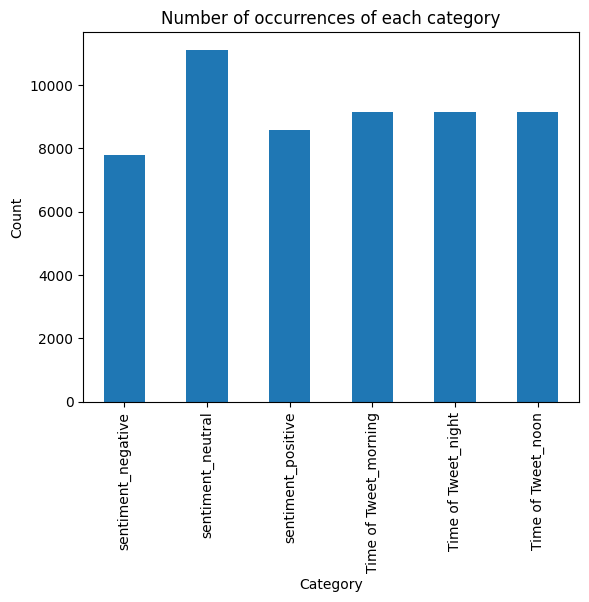

sentiment_negative        7781
sentiment_neutral        11118
sentiment_positive        8582
Time of Tweet_morning     9161
Time of Tweet_night       9160
Time of Tweet_noon        9160
dtype: int64


In [140]:
# Visualizing the Traning Dataset to Ensure no Heavy Bias
category_counts = data.drop(columns=['text']).sum()
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of occurrences of each category')
plt.show()
print(category_counts)

### More Data Preprocessing

Removing Numbers, Punctuation Marks, Special Characters, and Whitespaces